

Date: 14/04/2019

Environment: Python 3.7.0 and Anaconda3 5.2.0(64-bit)

Libraries used:

* re 2.2.1 (for regular expression, included in Anaconda Python 3.7.0)
* json 2.0.9 (for json file handling, included in  Anaconda Python 3.7.0)

## 1. Introduction
This assessment involves analyzing textual data for extracting meaningfull information from semi-structured text files. The dataset is a repository of unit details of the Monash University. The task is to extract information revelant to all the units   and transform the data into the XML and JSON with the following information:

1. Unit code: is a 7-character string (three uppercase letter followed by 4 digits).
2. Pre-requisites: only the unit codes of the units that are pre-requisite + co-requisite for the current unit (‘NA’ if the value is Null).
3. Prohibitions: only the unit codes of the units that are prohibited to be taken with the current unit (‘NA’ if the value is Null).
4. Synopsis: a string containing the synopsis of the unit (‘NA’ if the value is Null)
5. Requirements: the list of requirements of the current unit (‘NA’ if the value is Null).
6. Outputs: the list of outputs of the current unit (‘NA’ if the value is Null).
7. Chief-examiners: the list of the chief-examiners of the current unit (‘TBA’ if Null).

More details for each task will be given in the following sections.

## 2.  Import libraries 

In [1]:
import re
import json

## 3. Loading data

The unit information text file 'student_ID.txt' will be loaded so its first 20 lines can be inspected.

In [2]:
# print the lines of the file

file = open(r'C:/Users/Stephy/Documents/Studies/Data Science 2018/Sem 2/Wrangling/Assignment1/James_29915651_Assig1/29915651.txt','r')
file_contents = file.read()
#print(file_contents)
file.close()


## 4. Creating empty XML file

In [3]:
#Ref: https://stackoverflow.com/questions/15356641/how-to-write-xml-declaration-using-xml-etree-elementtree

xml_file = open('29915651.xml', 'w')
xml = '<?xml version="1.0" encoding="UTF-8" ?>\n'
xml_file.write(xml)
#xml_file.write("<units>\n")
xml_file.close()

We can see that the sample XML document has the root tag as units. 
Based on this information "units" is written into the file.


## 5. Creating empty dictionary for JSON file

In [4]:
#final_dict={"units":{"unit":[{"@id": "SCU2022",title: title, ..,..},{"@id": "SCU2022",title: title,.. },{}]}}
#starting from the list of units
list_of_units = []
#dict inside list for unit details 
unit_dtl_dict={}

The sample structure of JSON file is given as
{"units":{"unit":[{"@id": "SCU2022",title: title, ..,..},{"@id": "SCU2022",title: title,.. },{}]}}

Therefore creating a dict named unit_dtl_dict to store unit ID and corresponding details
The inner dict is saved in a list, names list_of_units

## 6.Examining data

Checking the number of units by simply counting of sequence appearing between the words 'class="unitcode">' and '</span>'.
This is because the unit code appears between these two strings.
For example
class="unitcode">SCU2022</span>

The regex pattern .* returns all characters between the strings as '.' match ANY character at all (including spaces, and non-alphanumeric characters). The star quantifier, matches 0 or more of the preceding character or group.

Ref: https://docs.woopra.com/v3.0/docs/regex

In [5]:
find_unit = re.findall(r'class="unitcode">(.*)</span>', file_contents)
print(len(find_unit))


400


There is potentially unit information for 400 unit's (in case there is no repeating units and all unit codes are valid)

## 7. Methodology

This following long segement of codes is in the following sequence<br />

1. Opening XML file<br />

The XML file is opened for simultaneous entry<br />
2. Extracting one unit detail at a time<br />

A for loop is executed to handle one unit at a time<br />
All the relevant items, as named below are extracted using regular expression from the 29915651.txt file<br />

3. From one unit, extracting<br />
    3a. Unit Code<br />
    3b. Title<br />
    3c. Synopsis<br />
    3d. Pre-requisites<br />
    3e. Prohibitions<br />
    3f. Requirements<br />
    3g. Outputs<br />
    3h. Chief Examiners<br />
    
The contents are written into XML and JSON file simulataneouly<br />
4. Sequence of writing into XML and preparing content for JSON file<br />
    4a. Unit Code<br />
    4b. Title<br />
    4c. Synopsis<br />
    4d. Pre-requisites<br />
    4e. Prohibitions<br />
    4f. Requirements<br />
    4g. Outputs<br />
    4h. Chief Examiners<br />
    
5. Closing of XML file
6. Opening, passing content and closing of JSON file

Each of the steps are explained with the code 
The regular expressions used are explained below

1. Unit

As the image suggests the words between the two light green boxes are checked for a pattern started with a word, repeating two times (making a total of three alphabets) and three following digits 

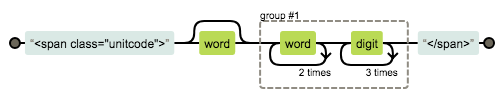

2. Title 

Any character(group1) between the span and span. Later on '-2019' is removed as per sample output

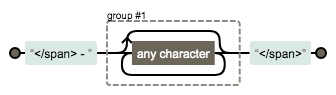

3. Synopsis<br />

The group1  is extracted between the given pattern
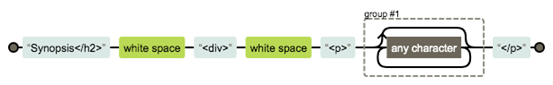


4. Prerequistes<br />

Done in two steps<br />

Paragraph of prerequites extracted as group 1 from between the phare shown in diagram<br /> and then from that paragraph unit code (/w{3}/d{4}) extracted just like above <br />
 
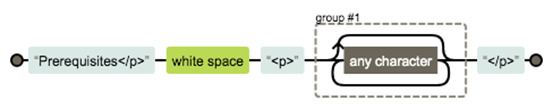


 
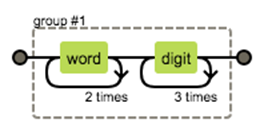

5. Co requistes<br />

Done in two steps<br />

Paragraph of  Co requistes extracted as group 1 from between the phare shown in diagram<br /> and then from that paragraph unit code (/w{3}/d{4}) extracted just like above <br />
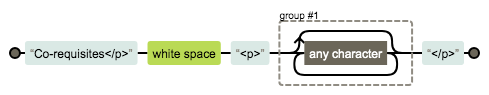


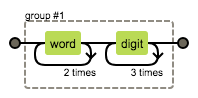

6. Outcomes

Done in two steps

Extract the larger paragraph containing the outcome bullet points from between the phare

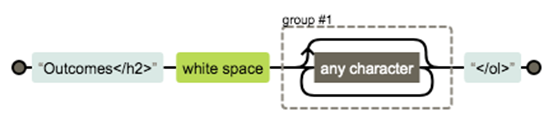

Extract the bullet point between li and /li

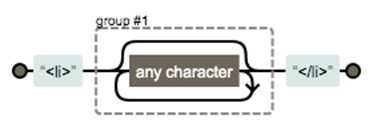

7.Requirements

Done in two steps

Extract the larger paragraph as group1 containing the requirement points from between the phare

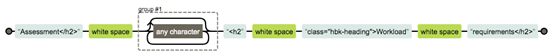

Extract requirements points from between p and /p

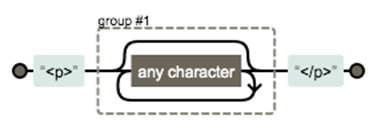

8. Chief Examiner

Done in two steps

Extract the pattern between Chief examiners(s)</p> and between cestop1 or cestop2 or cestop3, in the same order.

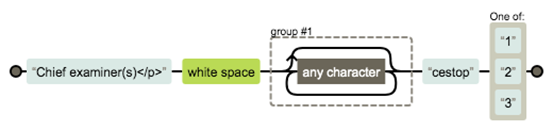

The pattern between "> and <a/> is extracted as name of examiner

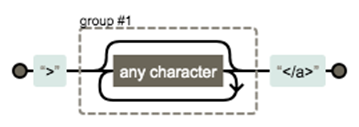

The steps in the code have been explained in all the sections

In [6]:
#Reopening the xml 
xml_file = open('29915651.xml', 'w')
xml = '<?xml version="1.0" encoding="UTF-8" ?>\n'
xml_file.write(xml)
xml_file.write("<units>\n")

#-------------------------------------------------------------------------------------------------------------------------------#
#Extracting one unit detail at a time
#Separting each unit by splitting the contents based on '<p class="visuallyhidden" id="breadcrumb__label">You are here:</p>''
r = r's*(<p class="visuallyhidden" id="breadcrumb__label">You are here:</p>)'
unit_dtl = re.split(r, file_contents)
unit_dtl


#each unit detail starts with '\n<ul aria-labelledby="breadcrumb__label" class="breadcrumbs__list">'
#in case the split function returns empty string then the following steps are not applicable 
for each_unit in unit_dtl:
    if each_unit.startswith('\n<ul aria-labelledby="breadcrumb__label" class="breadcrumbs__list">'):
        
        
        #------------------------------------------------------------------------------------------#
        
        #unit code is extracted as pattern (\w{3}\d{4}) 
        unit_code = re.findall(r'<span class="unitcode">\w?(\w{3}\d{4})</span>', each_unit)
        #print(unit_code)
        
        #------------------------------------------------------------------------------------------#
        
        #title is pattern of strings between </span> - and </span>
        #findall of group (.*?) returns a string in list format
        #'- 2019' is substituted with blank as it is not part of title
        title_html = re.findall(r'</span> - (.*?)</span>', each_unit)
        title = re.sub(r'<.*?>', '', title_html[0])
        title = re.sub(r'- 2019', '', title)
        #print(title)
        
        #------------------------------------------------------------------------------------------#
        
        #synopsis is pattern of strings between 'Synopsis</h2>\s<div>\s<p>'' - and '</span>'
        #if the synopsis_html is not empty and has the html tags, then they are subsituted by blank
        #else NA is stored in synopsis 
        synopsis_html = re.findall(r'Synopsis</h2>\s<div>\s<p>(.*?)</p>', each_unit)
        if len(synopsis_html) > 0:
            synopsis = re.sub(r'<.*?>', '', synopsis_html[0])
        else: 
            synopsis = 'NA'
      
        #------------------------------------------------------------------------------------------#
        
        #Prerequisites is pattern extracted from between 'Prerequisites</p>\s<p>' - and '</p>'
        #Prerequisites is unit code hence \w{3}\d{4} pattern is found
        #if Prerequisites not present then empty list is stored in pre_req
        #else unit code is stored in pre_req
        pre_req_html = re.findall(r'Prerequisites</p>\s<p>(.*?)</p>', each_unit)
        if len(pre_req_html) > 0:
            pre_req = re.findall(r'(\w{3}\d{4})', pre_req_html[0])
            if len(pre_req) == 0:
                pre_req = []
            #print(pre_req)
        else:
            pre_req = []
        
        
        #Co-requisites is pattern extracted from between 'Co-requisites</p>\s<p>' - and '</p>'
        #Co-requisites is unit code hence \w{3}\d{4} pattern is found
        #if Co-requisites not present then empty list is stored in co_req
        #else unit code is stored in co_req
        co_req_html = re.findall(r'Co-requisites</p>\s<p>(.*?)</p>', each_unit)
        if len(co_req_html) > 0:
            co_req = re.findall(r'(\w{3}\d{4})', co_req_html[0])
            if len(co_req) == 0:
                co_req = []
            #print(co_req)
        else:
            co_req = []
        
        
        #this step is very important as Prerequisites in sample is inclusive of Corequisites
        #hence tot_pre_req variable is upated with Prerequisites and Corequisites
        #this is representative of Prerequisites
        tot_pre_req = set(pre_req+co_req)
        
        #------------------------------------------------------------------------------------------#
        
        
        #prohibition is pattern extracted from between 'Prohibition</p>\s<p>' - and '</p>'
        #prohibition is unit code hence \w{3}\d{4} pattern is found
        #if prohibition not present then empty list is stored in prohibition
        #else unit code is stored in prohibition
        prohbition_html = re.findall(r'Prohibitions</p>\s<p>(.*?)</p>', each_unit)
        if len(prohbition_html) > 0:
            prohibition = re.findall(r'(\w{3}\d{4})', prohbition_html[0])
            #print(prohibition)
            if len(prohibition) == 0:
                prohibition = []
        else:
            prohibition = []  
        all_prohibition = set(prohibition)
        
        #------------------------------------------------------------------------------------------#
        
        
        #requirement is pattern extracted from between 'Assessment</h2>\s' and '<h2\sclass="hbk-heading">Workload\srequirements</h2>'
        #the points between '<p>' and '</p>' are requirements 
        #if requirements not present then empty list is stored in requirements
        #else html tags(if present) are removed from requirements and saved in variable requirement
        requirement_html = re.findall('Assessment</h2>\s(.*?)<h2\sclass="hbk-heading">Workload\srequirements</h2>', each_unit, re.S + re.M )
        #print(requirement_html)
        if len(requirement_html) > 0:
            requirement = re.findall(r'<p>(.*)</p>', requirement_html[0])
            correct_req=[]
            for each in requirement: 
                each =re.sub('(<.*?>)', '', each)
                correct_req.append(each)    
            requirement=correct_req
            if len(requirement) == 0:
                requirement = []
        else:
            requirement = []
        
        #------------------------------------------------------------------------------------------#
        
        
        #outcome is pattern extracted from between 'Outcomes</h2>\s' and '</ol>'
        #the points between '<li>' and '</li>' are outcome bullet points 
        #if outcomes not present then empty list is stored in outcome
        #else html tags(if present) are removed from outcome and saved in variable outcome
        outcome_html = re.findall('Outcomes</h2>\s(.*?)</ol>', each_unit, re.S + re.M )
        if len(outcome_html) > 0:
            outcome = re.findall(r'<li>(.*)</li>', outcome_html[0])
            correct_outcome =[]
            for each in outcome: 
                each =re.sub(r'(<.*?>)', '', each )
                correct_outcome.append(each)
            #print(outcome)
            outcome=correct_outcome
            if len(outcome) == 0:
                outcome = []
        else:
            outcome = []
            
        #------------------------------------------------------------------------------------------#      
        
        
        #Chief examiner was extracted from three different end points namely 'Coordinator', 'Unit guides' and 'Not offered in 2019'
        #for ease of codind the end points are substituted as cestop1, cestop2, and cestop3 respectively
        #starting point of extraction is 'Chief examiner\(s\)</p>\s'
        #the end points are chosen from cestop[123] in the order 1,2,3
    
        ce_each_unit =re.sub(r'Coordinator', ' cestop1 ', each_unit)
        ce_each_unit =re.sub(r'Unit guides', ' cestop2 ', ce_each_unit)
        ce_each_unit =re.sub(r'Not offered in 2019', ' cestop3 ', ce_each_unit)
        ce_html = re.findall(r"Chief examiner\(s\)</p>\s(.*?)cestop[123]" , ce_each_unit, re.S + re.M  )
        
        #ce is extracted from between '">' and '</a>'
        #html tags are removed if needed
        #chief 
        if len(ce_html)>0:
            ce = re.findall('">(.*)</a>', ce_html[0])
            correct_ce=[]
            for each in ce:
                each=re.sub('(<.*?>)', '', each)
                correct_ce.append(each)
            ce=correct_ce
            if len(ce) == 0:
                ce = []
        else:
            ce = []
        
        
        #----------------------------------------------------------------------------------------------------------------------#
        #------------------------Saving content into xml and json file-------------------------------#
        

        #---------------------------------------UNIT CODE--------------------------------------------#
        #required step unit code is a list 
        unit_code = unit_code[0]
        
        #-------------------------------------------XML---------------------------------------------#
        #writing unit code into xml file 
        temp=("<unit id='"+unit_code+"'>\n")
        xml_file.write(temp)
        
        #-------------------------------------------JSON--------------------------------------------#
        
        #writing unit code into json list
        unit_dtl_dict["@id"]=unit_code
        
        
        #-------------------------------------------TITLE--------------------------------------------#
       
        #-------------------------------------------XML---------------------------------------------#
        
        #writing unit title into xml file 
        xml_file.write('<title>'+' '+title+'</title>\n')
        
        #-------------------------------------------JSON--------------------------------------------#
        
        #writing unit title into json list
        unit_dtl_dict["title"]=title
        
        
        
        #------------------------------------------SYNOPSIS-----------------------------------------#
        
        #-------------------------------------------XML--------------------------------------------#
        
        #writing unit synopsis into xml file 
        xml_file.write('<synopsis>'+synopsis+'</synopsis>\n')
        
        #-------------------------------------------JSON--------------------------------------------#
        
        #writing unit synopsis into json list 
        unit_dtl_dict["synopsis"]=synopsis
        
        
        #-------------------------------------PRE REQUISTICS---------------------------------------#
        #-------------------------------------------XML--------------------------------------------#
        
        #writing pre_requistics into xml file
        if len(tot_pre_req)==0:
            xml_file.write('<pre_requistics>'+' NA '+'</pre_requistics>\n')
        else:
            tot_req_ls=list(tot_pre_req)
            xml_file.write('<pre_requistics>\n')
            for i in range(len(tot_req_ls)):
                xml_file.write('<pre_requistic>'+tot_req_ls[i]+'</pre_requistic>')
            xml_file.write('</pre_requistics>\n')
            
        #-------------------------------------------JSON--------------------------------------------#
        
        #writing pre_requistics into json list
        if len(tot_pre_req)==0:
            unit_dtl_dict["pre_requistics"]="NA"
        else:
            tot_req_ls=list(tot_pre_req)
            if len(tot_req_ls)==1: 
                unit_dtl_dict["pre_requistics"]={"pre_requistic":tot_req_ls[0]}
            else:
                unit_dtl_dict["pre_requistics"]={"pre_requistic":tot_req_ls}       
        
        #---------------------------------------PROHIBITION-----------------------------------------#
        #-------------------------------------------XML--------------------------------------------#
        
        #writing prohibitions into xml file
        if len(all_prohibition)==0:
            xml_file.write('<prohibisions>'+' NA '+'</prohibisions>\n')
        else:
            prohibition_ls=list(all_prohibition)
            xml_file.write('<prohibisions>\n')
            for i in range(len(prohibition_ls)):
                xml_file.write('<prohibision>'+prohibition_ls[i]+'</prohibision>')
            xml_file.write('</prohibisions>\n')
       
    
        #-------------------------------------------JSON--------------------------------------------#
        
        #writing prohibitions into json list
        if len(all_prohibition)==0:
            unit_dtl_dict["prohibisions"]="NA"
        else:
            prohibition_ls=list(all_prohibition)
            if len(prohibition_ls)==1: 
                unit_dtl_dict["prohibisions"]={"prohibision":prohibition_ls[0]}
            else:
                unit_dtl_dict["prohibisions"]={"prohibision":prohibition_ls}
                
        #---------------------------------------REQUIREMENTS---------------------------------------#
        #----------------------------------------------XML-----------------------------------------#
        
        #writing requirements into xml file
        if len(requirement)==0:
            xml_file.write('<requirements>'+'NA'+'</requirements>\n')
        else:
            xml_file.write('<requirements>\n')
            for i in range(len(requirement)):
                xml_file.write('<requirement>'+requirement[i]+'</requirement>')
            xml_file.write('</requirements>\n')

        #-------------------------------------------JSON--------------------------------------------#
        
        #writing requirements into json list
        if len(requirement)==0:
            unit_dtl_dict["requirements"]="NA"
        else:
            if len(requirement)==1: 
                unit_dtl_dict["requirements"]={"requirement":requirement[0]}
            else:
                unit_dtl_dict["requirements"]={"requirement":requirement}
        
        #---------------------------------------OUTCOME-------------------------------------------#
       #-------------------------------------------XML--------------------------------------------#
        
        #writing outcomes into xml file    
        if len(outcome)==0:
            xml_file.write('<outcomes>'+'NA'+'</outcomes>\n')
        else:
            xml_file.write('<outcomes>\n')
            for i in range(len(outcome)):
                xml_file.write('<outcome>'+outcome[i]+'</outcome>')
            xml_file.write('</outcomes>\n')
        
        
        #-------------------------------------------JSON--------------------------------------------#
        
        #writing outcome into json list
        if len(outcome)==0:
            unit_dtl_dict["outcomes"]="NA"
        else:
            if len(outcome)==1: 
                unit_dtl_dict["outcomes"]={"outcome":outcome[0]}
            else:
                unit_dtl_dict["outcomes"]={"outcome":outcome}

        #----------------------------------------CHIEF--EXAMINER-----------------------------------#
        #-------------------------------------------XML--------------------------------------------#
       
        #writing cheif examiner into xml file
        if len(ce)==0:
            xml_file.write('<chief_examiners>'+' TBA '+'</chief_examiners>\n')
        else:
            xml_file.write('<chief_examiners>\n')
            for i in range(len(ce)):
                xml_file.write('<chief_examiner>'+ce[i]+'</chief_examiner>')
            xml_file.write('</chief_examiners>\n')

        #-------------------------------------------JSON--------------------------------------------#
        
        #writing cheif examiner into json file
        if len(ce)==0:
            unit_dtl_dict["chief_examiners"]="TBA"
        else:
            if len(ce)==1: 
                unit_dtl_dict["chief_examiners"]={"chief_examiner":ce[0]}
            else:
                unit_dtl_dict["chief_examiners"]={"chief_examiner":ce}
    
        #------------------------------------------------------------------------------------------#
        #------------------------------------------------------------------------------------------#
        
        #end of each unit in xml
        xml_file.write("</unit>\n")  
        
        #------------------------------------------------------------------------------------------#

        #details of each unit in the form of dict is appended to the major list with all unit details
        list_of_units.append(unit_dtl_dict.copy())

        
#-------------------------------------------------------------------------------------------------------------------------------#
        
#xml file closes       
xml_file.write(("</units>\n"))
xml_file.close()

#-------------------------------------------------------------------------------------------------------------------------------#

#json list appended
unit_dict={"unit":list_of_units}
out_unit_dict ={"units": unit_dict}

#creating a new file for json output
json_file = open("29915651.json",'w')
#using json library function to write the output
json_file.write(json.dumps(out_unit_dict, indent=2))
json_file.close()


## 8. Summary
This assessment measured the understanding of basic text extracting techniques in the Python programming language using regex.
The main outcomes achieved while applying these techniques were:

- **Requirement gathering** By studying and analysing only the sample outputs, all the requirements were understood 
- **txt file parsing and data extraction**. By using the built-in `regex` module. With functions like `sub()` and `findall()`, it was possible to access html tagged text data with ease.
- **XML file creation**. XML file creation with appropriate tags was possible without using any external modules. This assignment was helpful is understanding that file read and write commands is all that is needed for XML document creation
- **JSON file creation**. By using list and dictionary the basic structure of JSON file was created, helping to understand the JSON structure especially when value are single items and when values are multiple items(stored as list)


## 9.Refrences

Regex basics
https://stackoverflow.com/questions/47722585/regular-expression-to-extract-contents-between-two-specific-words-using-pythono
https://docs.woopra.com/v3.0/docs/regex

Single line and Multi line in Regex
https://stackoverflow.com/questions/39443427/extract-multiple-lines-from-a-file-using-regular-expressions-in-python
        
XML file creation
https://stackoverflow.com/questions/15356641/how-to-write-xml-declaration-using-xml-etree-elementtree

JSON file creation
https://stackoverflow.com/questions/36902101/python-writes-empty-json-file